In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path
import math
import scipy.stats as stats

In [7]:
#Synthetic Data Generation
data1= np.random.normal(10, .2, 5)
data2= np.random.normal(9, .4, 5)
data= np.concatenate((data1, data2))
np.random.shuffle(data)
data= data[:, np.newaxis]
print(data)

[[10.17488256]
 [ 9.76136713]
 [ 9.21110048]
 [ 9.93456813]
 [ 8.70873244]
 [10.32271303]
 [ 8.78994956]
 [ 9.34139156]
 [ 9.09915324]
 [10.16096164]]


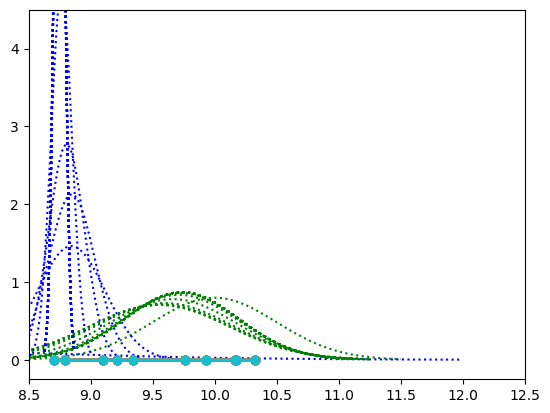

In [9]:
#Gaussian_Class_1
m1 = 10  #Mean
v1 = .5 #SD    
prior1= 0.99

#Gaussian_Class_2
m2 = 6  #Mean
v2 = 2  #SD
prior2= 0.01

itr= 20
error=np.zeros((itr,1))

for i in range(itr):
    #Plotting Gaussian curves for each iteration 
    plt.plot(data, np.zeros((data.size,1)), marker='o')    #Data Plotting
    x1 = np.linspace(m1 - 3*v1, m1 + 3*v1, 100)
    x2 = np.linspace(m2 - 3*v2, m2 + 3*v2, 100)
    plt.plot(x1, stats.norm.pdf(x1, m1, v1), color='green', linestyle='dotted')
    plt.plot(x2, stats.norm.pdf(x2, m2, v2), color='blue', linestyle='dotted')
    plt.xlim(8.5,12.5)
    plt.ylim(-.25,4.5)
    
    #Expectation Calculation Step
    
    #Likelihood of data belonging to each Gaussian
    like1= (1/(v1*np.sqrt(2*np.pi)))* np.exp(-0.5*((data - m1)/v1)**2)  #Likelihood for Gaussian_1
    like2= (1/(v2*np.sqrt(2*np.pi)))* np.exp(-0.5*((data - m2)/v2)**2)  #Likelihood for Gaussian_2
    
    ln_l = np.sum(np.log(like1*prior1+like2*prior2), axis=0)   #Log likelihood Function
    error[i]=ln_l
    #print("Log likelihood is: ",ln_l)
    
    #Normalisation_Factor_for_Bayes
    norm1 = prior1*like1   
    norm2 = prior2*like2
    norm= norm1 + norm2     
    
    #Posterior Calculation
    posterior1= (like1*prior1)/norm   #Posterior for Gaussian_1
    posterior2= (like2*prior2)/norm   #Posterior for Gaussian_2 
    
    #Maximization Step
    
    #Parameter recalculation for Gaussian 1
    m1= np.sum(posterior1*data)/np.sum(posterior1)
    v1= np.sqrt(np.sum(((data-m1)**2)*posterior1)/np.sum(posterior1))
    prior1= np.sum(posterior1)/10
    
    #Parameter recalculation for Gaussian 2 
    m2= np.sum(posterior2*data)/np.sum(posterior2)
    v2= np.sqrt(np.sum(((data-m2)**2)*posterior2)/np.sum(posterior2))
    prior2= np.sum(posterior2)/10
    
    
    
    
plt.plot(error, np.linspace(0, itr, num=itr))  #Log likelihood plot over each iteration